# Lending Group Case Study

## **Problem Statement**

The goal is to reduce **credit loss** by identifying **risky loan applicants (defaulters)** based on patterns in the data. Using EDA, we will analyze borrower and loan attributes to uncover the driving factors behind loan defaults. This information will help the company make better decisions on loan approvals, such as:
- Rejecting risky applications
- Reducing loan amounts
- Increasing interest rates for specific categories of borrowers

### **Classify Loan Outcomes**:
1. **Fully Paid**: Applicants who repaid the loan successfully.
2. **Current**: Applicants still paying their loan installments (not defaulted yet).
3. **Charged-Off**: Applicants who defaulted on the loan, causing financial losses.

> **Applicants in the "Charged-Off" category are considered defaulters.**

## **Identify Driver Variables**
- Analyze borrower demographics, credit attributes, and loan attributes to determine the factors contributing to defaults.
- These insights will guide the company to:
  - Target low-risk applicants
  - Avoid financial losses

## **Steps for Processing**

### **1. Data Understanding**
- Start by loading and examining the dataset (`loan.csv`).
- Identify the dataset’s structure:
- Number of rows and columns
- Data types of columns
- Presence of null values
- General overview of variables
- Meaning of each column and its relevance to the analysis. Refer to the data dictionary (Data_Dictionary.xlsx) for more information.

### **2. Data Cleaning**
1. **Handling Missing Values**:
    - Impute missing values using appropriate strategies or drop them based on their relevance to the analysis.
    - Imputing missing values in `emp_length` based on `annual_inc`.
    - Drop columns with more than 80% missing values. Decide to threshold is 80% to make sure the data loss is minimal but still relevant for analysis.

2. **Standardizing Values**:
    - Ensure categorical variables are consistent and properly formatted for analysis.
    - Convert `term` to integer
    - Extract numeric values from `emp_length` and convert to integer
    - Convert `int_rate` to float
    - Extract month and year from `issue_d`
    - Convert float values to 2 decimal places
    - Handle data inconsistencies and discrepancies.

3. **Dropping Unnecessary Columns**:
   - Remove columns that are redundant or irrelevant to simplify the dataset.
   - Unique Identifiers:
    _'id', 'member_id'_
   - System Metadata:
    _'url', 'desc', 'policy_code', 'application_type'_
    - Redundant Features:
    _'funded_amnt', 'funded_amnt_inv'_
    - Irrelevant:
    _'total_pymnt', 'total_rec_prncp', 'total_rec_int'
    'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt'
    'out_prncp', 'out_prncp_inv', 'last_credit_pull_d'_
    - Additional Columns:
    _'emp_title', 'initial_list_status', 'pymnt_plan', 'earliest_cr_line',
    'inq_last_6mths', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec',
    'recoveries', 'revol_bal', 'revol_util', 'title', 'total_acc',
    'total_pymnt_inv', 'total_rec_late_fee', 'url', 'zip_code',
    'pub_rec_bankruptcies', 'delinq_2yrs', 'mths_since_last_delinq'_

4. **Investigating Outliers**:
    - Inspect numerical columns for potential outliers.
    - Determine the handling strategy (e.g., capping, transformation, or removal) based on their impact on the analysis.
    - Visualize the outliers using box plots. Detect and handle outliers in the `annual_inc` column by applying the **Interquartile Range (IQR)** method.

5. **Handling Invalid Values**:
    - Identify and correct or remove values that are inconsistent or logically incorrect.
    - Remove duplicated
    - Remove single unique value columns

6. **Filtering Data**:
    - Apply filters to retain only the relevant data for the analysis, based on specific conditions or criteria.
    - Drop rows where loan_status is 'Current'

### **3. Data Analysis**

**Univariate Analysis**
   - Analyze the distribution of ordered and unordered categorical variables.
   - Identify the frequency of each category and visualize the results using bar plots.

**Bivariate Analysis**
   - Compare two variables to identify patterns and relationships between them.
   - Use visualizations such as bar plots, box plots, and heatmaps to analyze the data.

**Multivariate Analysis**
- Analyze multiple variables to understand complex relationships and patterns in the data.
- Use correlation matrices, heatmaps, and other advanced visualizations to uncover insights.


### Import necessary Libraries

In [1017]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [1018]:
# Check library versions
import matplotlib  # Import the main matplotlib package
import sys  # For Python version

print("Python version:", sys.version)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Python version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
Pandas version: 2.2.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2
Seaborn version: 0.13.2


### Common function definition

In [1019]:
# Drops the specified columns from the given DataFrame.
def drop_columns(dataframe, columns):
    dataframe.drop(columns=columns, inplace=True)
    return dataframe

In [1020]:
# Function to create boxplot
def create_boxplot(data, column, title=None):
    sns.boxplot(data[column])

    # Add title if provided, otherwise use a default one
    if title:
        plt.title(title)
    else:
        plt.title(f"Boxplot of {column}")
    plt.show()

In [1021]:
# Function to get distinct value of a specific column
def get_distinct_values(data, column):
    return data[column].unique().tolist()

In [1022]:
# Function to get value counts of a specific column
def get_value_counts(data, column):
    return data[column].value_counts()

In [1023]:
# Function to list out null values sum in DataFrame
def null_values_summary(data):
    return data.isna().sum().sort_values(ascending=False)


### Reading data from the provided 'loan.csv' file

In [1024]:
loan = pd.read_csv('loan.csv', low_memory=False)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [1025]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### **Handle missing data**

**Check whether null values and how much they are in the loan data**

In [1026]:
null_values_summary(loan)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

*There are multiple columns having null value. Considering to drop of them*

**Count columns which having more than 80% of null value itself**

In [1027]:
# Count the number of columns with  null values
missing_values_threshold = 80 #80%
missing_values_threshold_percentage = missing_values_threshold/100
missing_values_columns = (loan.isnull().mean() > missing_values_threshold_percentage).sum()

print(f"Number of columns with more than {missing_values_threshold}% null values: {missing_values_columns}/{loan.shape[1]}")

Number of columns with more than 80% null values: 56/111


**Decide to drop columns having more than 80% null column**

In [1028]:
loan = loan.loc[:, loan.isnull().mean() < missing_values_threshold_percentage]
loan.shape

(39717, 55)

> There are **55** columns in the dataset left after dropping columns

### **Drop all unnecessary columns**

*There are several columns that may not be relevant for the analysis and can therefore be excluded or dropped from the dataset.*

In [1029]:
# List of columns to drop
unnecessary_columns_to_drop = [
    # Unique Identifiers
    'id', 'member_id',

    # System Metadata
    'url', 'desc', 'policy_code', 'application_type',

    # Redundant Features
    'funded_amnt', 'funded_amnt_inv',

    # Irrelevant
    'total_pymnt', 'total_rec_prncp', 'total_rec_int',
    'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
    'out_prncp', 'out_prncp_inv', 'last_credit_pull_d',

    # Additional Columns
    'emp_title', 'initial_list_status', 'pymnt_plan', 'earliest_cr_line',
    'inq_last_6mths', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec',
    'recoveries', 'revol_bal', 'revol_util', 'title', 'total_acc',
    'total_pymnt_inv', 'total_rec_late_fee', 'url', 'zip_code',
    'pub_rec_bankruptcies', 'delinq_2yrs', 'mths_since_last_delinq'
]

# Drop the specified columns and display the altered DataFrame's shape
drop_columns(loan, unnecessary_columns_to_drop)
loan.shape

(39717, 20)

> There are **20** columns in the dataset left after dropping columns

### **Handle invalid values**

**Check duplicated row**

*This helps ensure data quality and avoid redundancy in the analysis.*

In [1030]:
duplicated_sum =  loan.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_sum}")

Number of duplicated rows: 0


*There is no duplicated row. No action required*

**Check single unique value columns**

In [1031]:
# Check for single unique value columns
single_unique_cols = loan.columns[loan.nunique() == 1]

# Print the names of columns with a single unique value
print(f"Columns with a single unique value: {single_unique_cols.shape[0]}")


Columns with a single unique value: 5


**Drop single unique value columns**

In [1032]:
drop_columns(loan, single_unique_cols)
loan.shape

(39717, 15)

> There are **15** columns in the dataset left after dropping columns

### **Filtering data**

**Drop loan status as 'Current'**

_Records where `loan_status` is marked as *'Current'* can be dropped from the dataset, as loans in progress do not provide insights into the borrower's likelihood of default. These records are excluded to focus the analysis on completed loan outcomes._

In [1033]:
# Drop rows where loan_status is 'Current'
loan.drop(loan[loan['loan_status'].str.strip().str.lower() == 'current'].index, inplace=True)
loan.shape

(38577, 15)

### **Standardising values**

**Check datatype**

In [1034]:
loan.dtypes

loan_amnt                int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
dtype: object

*The column 'loan_amnt' must be float number instead of integer number. Decide to convert datatype for this column*

In [1035]:
#Convert to float for loan_amnt
loan = loan.astype({
    'loan_amnt' : 'float'
})

**Convert data to standardize values**

In [1036]:
# Convert term value to number only (int)
loan['term'] = loan['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [1037]:
# Convert term value  to number only (float)
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [1038]:
# Convert and extract month and year
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['issue_month'] = loan['issue_d'].dt.strftime('%B')
loan['issue_year'] = loan['issue_d'].dt.year
drop_columns(loan, ['issue_d'])

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_month,issue_year
0,5000.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,December,2011
1,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,December,2011
2,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,December,2011
3,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,December,2011
5,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,December,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,36,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,CO,11.33,July,2007
39713,8500.0,36,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Fully Paid,credit_card,NC,6.40,July,2007
39714,5000.0,36,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,MA,2.30,July,2007
39715,5000.0,36,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,other,MD,3.72,July,2007


In [1039]:
# Convert float values to 2 decimals.
for col in ['loan_amnt', 'int_rate', 'annual_inc', 'dti']:
    loan[col] = loan[col].apply(lambda x: round(x, 2))

### **Investigating Outliers**

***Visualizing the distribution of `annual_inc`, `int_rate`, and `dti` using box plots to identify potential outliers***

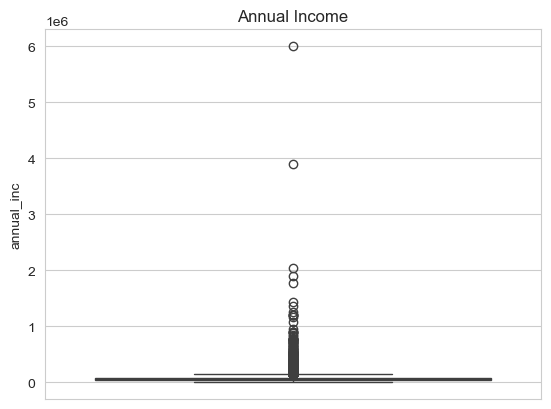

In [1040]:
# Visualizing annual income
create_boxplot(
    loan,
    'annual_inc',
    'Annual Income')

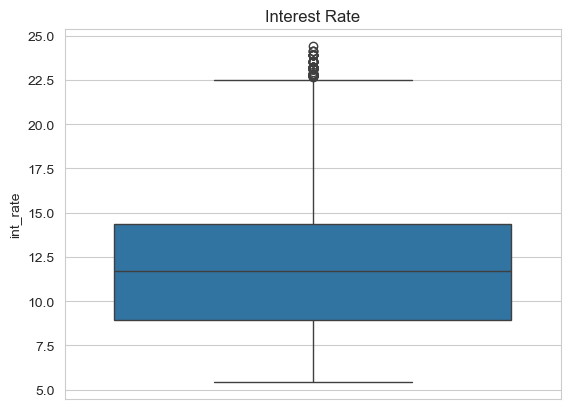

In [1041]:
create_boxplot(
    loan,
    'int_rate',
    'Interest Rate')

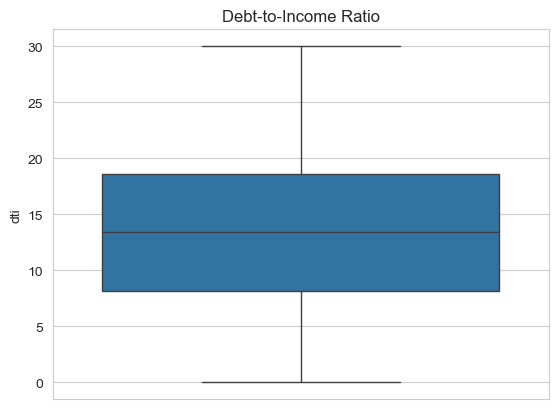

In [1042]:
create_boxplot(
    loan,
    'dti',
    'Debt-to-Income Ratio')

***We can see that annual income having outliers. Outliers tend to lie far from the median. Use Inter Quartile Range (IQR) for skewed data.***

**Remove outliers using the IQR method for column `annual_inc`**

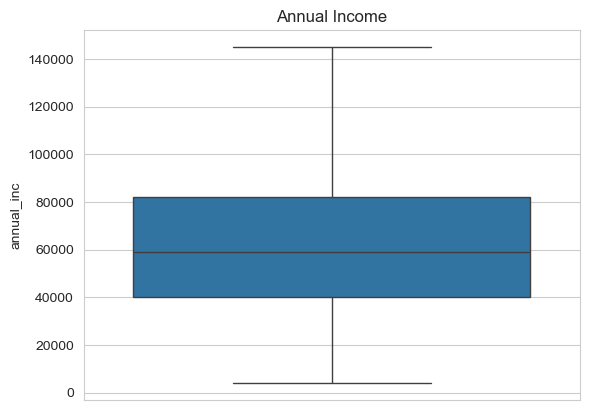

In [1043]:
# Calculate inter quartile
annual_income = loan['annual_inc']
Q1 = annual_income.quantile(0.25)
Q3 = annual_income.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


 # Handle Outliers
loan['annual_inc'] = annual_income.clip(lower=lower_bound, upper=upper_bound)

# Visualize Outliers (Boxplot)
create_boxplot(
    loan,
    'annual_inc',
    'Annual Income')


***After removing outliers for `annual_inc` column now it becomes normal distribution***

### Imputing values

**Handle data for `verification_status` column**

In [1044]:
# Get distinct values of a column
get_distinct_values(loan, 'verification_status')

['Verified', 'Source Verified', 'Not Verified']

***Can see that `Verified` and `Source Verified` are both the same meaning so replacing all `Source Verified` to `Verified`***

In [1045]:
# Replace 'Source Verified' with 'Verified'
loan['verification_status'].replace('Source Verified', 'Verified', inplace = True)
get_distinct_values(loan, 'verification_status')

['Verified', 'Not Verified']

**Handle data for `home_ownership` column**

In [1046]:
# Get distinct values of the column
get_value_counts(loan, 'home_ownership')

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

***`NONE` can be treated as `OTHER` because it is not a valid value for `home_ownership`. Replace `NONE` with `OTHER`***

In [1047]:
# Replace 'NONE' with 'OTHER'
loan['home_ownership'].replace('NONE', 'OTHER', inplace = True)
get_distinct_values(loan, 'home_ownership')


['RENT', 'OWN', 'MORTGAGE', 'OTHER']

**Handle Employment Length (`emp_length`)**

***`emp_length` having string values with suffix 'year' or 'years'. Need to extract numeric values from this column.***

In [1048]:
# Create function to clean the `emp_length` column by extracting numeric values
def clean_emp_length(emp_length):
    if isinstance(emp_length, str):
        if 'year' in emp_length:
            emp_length = emp_length.replace(' years', '').replace(' year', '')
        if '+' in emp_length:
            emp_length = emp_length.replace('+', '')
        if '<' in emp_length:
            emp_length = '0'
        return pd.to_numeric(emp_length, errors='coerce')
    return emp_length

# Apply the function to clean the `emp_length` column and convert it to integer
loan['emp_length'] = loan['emp_length'].apply(clean_emp_length).astype('Int64')

# # Sort the DataFrame by the cleaned emp_length column
loan.sort_values(by='emp_length', ascending=False, inplace=True)

get_distinct_values(loan, 'emp_length')

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, <NA>]

**Check missing data**

In [1049]:
null_values_summary(loan)

emp_length             1033
loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
addr_state                0
dti                       0
issue_month               0
issue_year                0
dtype: int64

***There are 1033 missing value rows for Employment Length (`emp_length`) which needs to impute value.
Try to explore Annual Income (annual_inc)***

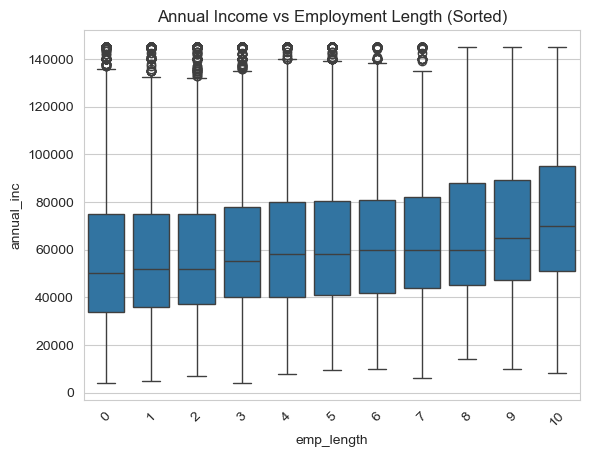

In [1050]:
sns.boxplot(x='emp_length', y='annual_inc', data=loan)
plt.title('Annual Income vs Employment Length (Sorted)')
plt.xticks(rotation=45)
plt.show()

**Insight**:
- `annual_inc` increases consistently with `emp_length`, we can use income as a predictor for imputing employment length.

In [1051]:
#Create the `income_bucket` column
loan['income_bucket'] = pd.cut(
    loan['annual_inc'],
    bins=[0, 50000, 100000, 150000, 200000, 1e6],
    labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']
)

#Calculate the median emp_length for each income bucket
bucket_medians = loan.groupby('income_bucket')['emp_length'].median()

#Impute missing emp_length values based on the income bucket
for bucket, median in bucket_medians.items():
    loan.loc[
        (loan['income_bucket'] == bucket) & (loan['emp_length'].isna()),
        'emp_length'
    ] = median

**Check missing data**

In [1052]:
null_values_summary(loan)

loan_amnt              0
verification_status    0
issue_year             0
issue_month            0
dti                    0
addr_state             0
purpose                0
loan_status            0
annual_inc             0
term                   0
home_ownership         0
emp_length             0
sub_grade              0
grade                  0
installment            0
int_rate               0
income_bucket          0
dtype: int64

> There is no missing data in the dataset after imputing the `emp_length` column.

**Create Year Experience Bucket based on Employment Length**

In [1053]:
# Create buckets
loan['emp_length_bucket'] = pd.cut(
    loan['emp_length'],
    bins=[-1, 3, 5, 10, float('inf')],  # Define bins for each bucket
    labels=['0-3 years', '>3 and <5 years', '5 to <10 years', '+10 years'],  # Labels for the buckets
    right=False  # Exclude the right edge of intervals (e.g., 5 is in '5 to <10')
)

# # Correct the label for the exact 10 years
# loan['emp_length_bucket'] = loan['emp_length_bucket'].cat.add_categories('10 years').replace(
#     {pd.Interval(10.0, float('inf'), closed='left'): '10 years'})
# loan['emp_length_bucket'].cat.reorder_categories(['0-3 years', '5 to <10 years', '10 years', '>3 and <5 years'], inplace=True)

**Cleaned data for doing analysis**

In [1054]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_month,issue_year,income_bucket,emp_length_bucket
0,5000.0,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,Fully Paid,credit_card,AZ,27.65,December,2011,0-50k,+10 years
24974,16000.0,36,11.86,530.36,B,B5,10,RENT,74337.72,Verified,Fully Paid,debt_consolidation,CA,18.79,October,2010,50k-100k,+10 years
9228,18225.0,60,17.49,457.76,D,D5,10,MORTGAGE,55000.00,Verified,Fully Paid,credit_card,IL,20.84,August,2011,50k-100k,+10 years
24965,1800.0,36,13.23,60.85,C,C1,10,RENT,29040.00,Verified,Charged Off,car,MA,3.08,October,2010,0-50k,+10 years
9230,6800.0,36,18.39,247.17,E,E2,10,MORTGAGE,70000.00,Verified,Fully Paid,debt_consolidation,NC,21.02,August,2011,50k-100k,+10 years


## Data Analysis

### Univariate Analysis

1. **Categorical variables**
   - **Ordered categorical data**:
     1. Grade (`grade`)
     2. Sub grade (`sub_grade`)
     3. Term (`term`)
     4. Employment length (`emp_length`)
     5. Issue year (`issue_year`)
     6. Issue month (`issue_month`)
     7. Income bucket (`income_bucket`)
     8. Employment Length Bucket (`emp_length_bucket`)

   - **Unordered categorical data**:
     1. Address State (`addr_state`)
     2. Loan purpose (`purpose`)
     3. Home Ownership (`home_ownership`)

2. **Quantitative variables**:
   1. Interest rate (`int_rate`)
   2. Annual income (`annual_inc`)
   3. Loan amount (`loan_amnt`)
   4. Debt to Income Ratio (`dti`)
   5. Monthly Installment (`installment`)


**Common functions for analysis**

In [1055]:
# Set default figure size and palette
FIG_SIZE = (8, 6)
PALETTE="pastel"

In [1056]:
def create_barplot(x, y, title=None, xlabel=None, ylabel=None, palette=PALETTE, rotation=0):
    # Set plot size and style
    plt.figure(figsize=FIG_SIZE)
    sns.set_style("whitegrid")

    # Create bar plot
    sns.barplot(
        x=x,
        y=y,
        palette=palette
    )

    # Add titles and labels
    if title is not None:
        plt.title(title, fontsize=14, weight='bold')
    if xlabel is not None:
        plt.xlabel(xlabel, fontsize=12)
    else:
        plt.xlabel("Count", fontsize=12)

    if ylabel is not None:
        plt.ylabel(ylabel, fontsize=12)
    else:
        plt.ylabel("Categories", fontsize=12)

    # Rotate x-axis ticks if needed
    plt.xticks(rotation=rotation)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


In [1057]:
def create_boxplot_chart(data, x, y, title=None, xlabel=None, ylabel=None, palette=PALETTE, rotation=0):

    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Create the boxplot
    sns.boxplot(data=data, x=x, y=y, palette=palette)

    # Add the title if provided
    if title:
        plt.title(title, fontsize=14, weight='bold')

    # Add x-axis label if provided
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)

    # Add y-axis label if provided
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis ticks if needed
    plt.xticks(rotation=rotation)

    # Show the plot
    plt.tight_layout()
    plt.show()


**Filtered by 'Charged Off'**

In [1058]:
# Filter data
charged_off_data = loan[loan['loan_status'] == 'Charged Off']

**Distribution of Loan Status**

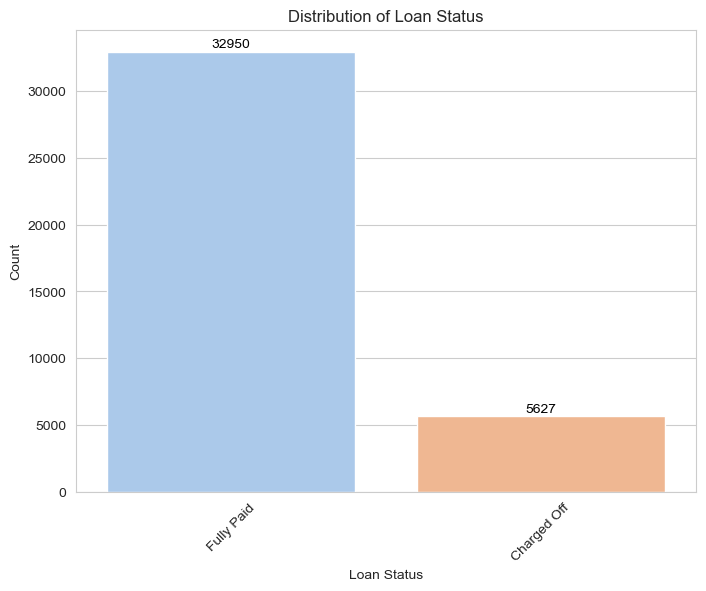

In [1059]:
plt.figure(figsize=FIG_SIZE)
sns.set_style("whitegrid")
ax = sns.countplot(data=loan, x='loan_status', palette=PALETTE, order=loan['loan_status'].value_counts().index)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [1060]:
# Calculate the ratio of each loan status
status_ratios = loan["loan_status"].value_counts(normalize=True) * 100

# Print results
print("Loan Status Ratios:")
status_ratios

Loan Status Ratios:


loan_status
Fully Paid     85.413588
Charged Off    14.586412
Name: proportion, dtype: float64

> The loan portfolio is healthy with most loans (85.4%) being fully paid, indicating effective credit policies. However, the 14.6% charge-off rate suggests areas for improvement in risk management and borrower assessment.

**Distribution of Interest Rate**

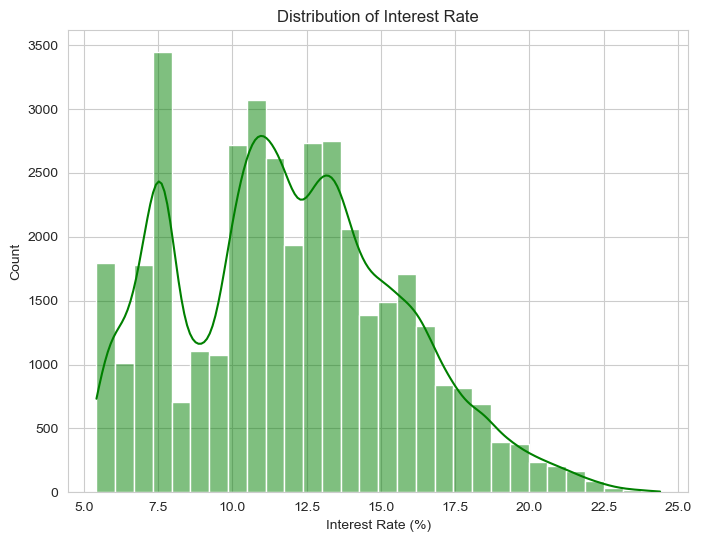

In [1061]:
plt.figure(figsize=FIG_SIZE)
sns.set_style("whitegrid")
sns.histplot(loan['int_rate'], kde=True, bins=30, color='green')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.show()

> Peaks observed at 10%-15% for charged-off loans, suggesting interest rates are a significant risk factor.

**Loan Term Distribution for `Charged Off` Status**

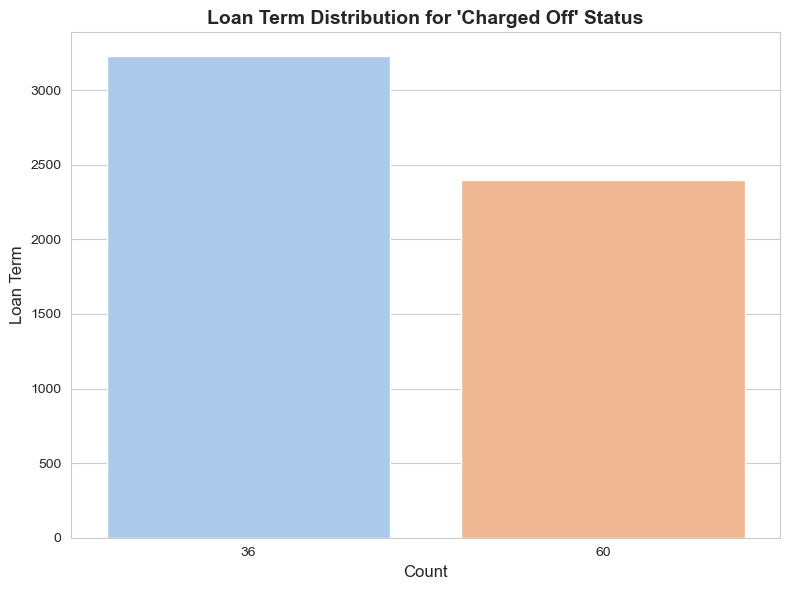

In [1062]:
# Calculate data
x_data = charged_off_data['term'].value_counts().index  # Categories (y)
y_data = charged_off_data['term'].value_counts().values  # Counts (x)

#Visulize chart
create_barplot(
    x=x_data,
    y=y_data,
    title="Loan Term Distribution for 'Charged Off' Status",
    xlabel="Count",
    ylabel="Loan Term"
)

> The majority of `Charged Off` loans are associated with a **36-month term**, indicating higher default rates for shorter-term loans compared to the **60-month term**.

**Employment Length Distribution for `Charged Off` Status**

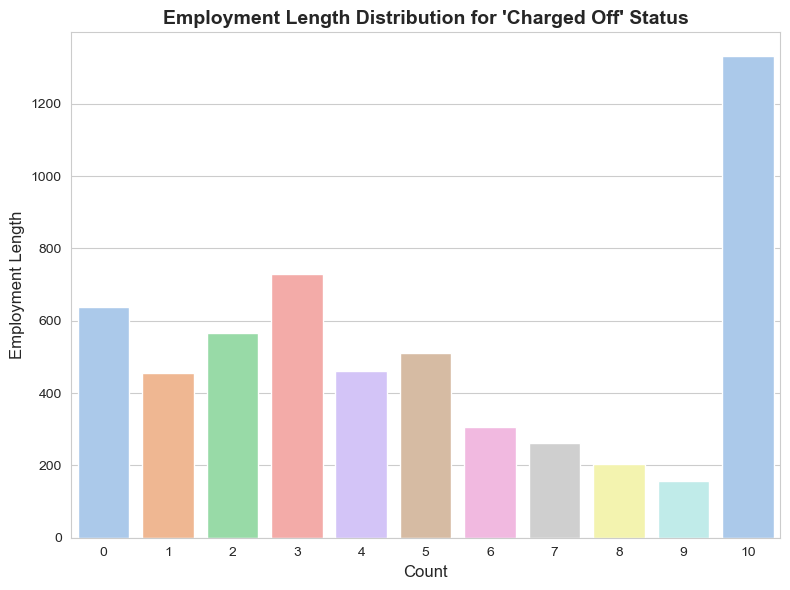

In [1063]:
# Extract data for plotting
y_data = charged_off_data['emp_length'].value_counts()
x_data = y_data.index

#Visulize chart
create_barplot(
    x=x_data,
    y=y_data,
    title="Employment Length Distribution for 'Charged Off' Status",
    xlabel="Count",
    ylabel="Employment Length"
)

> Borrowers with **10+ years of employment**, despite their presumed stability, might still pose a higher default risk. It could indicate that other factors, such as loan amounts, debt-to-income ratio, or financial habits, play a significant role in defaults rather than employment length alone.

**Loan Purpose Distribution for `Charged Off` Status**

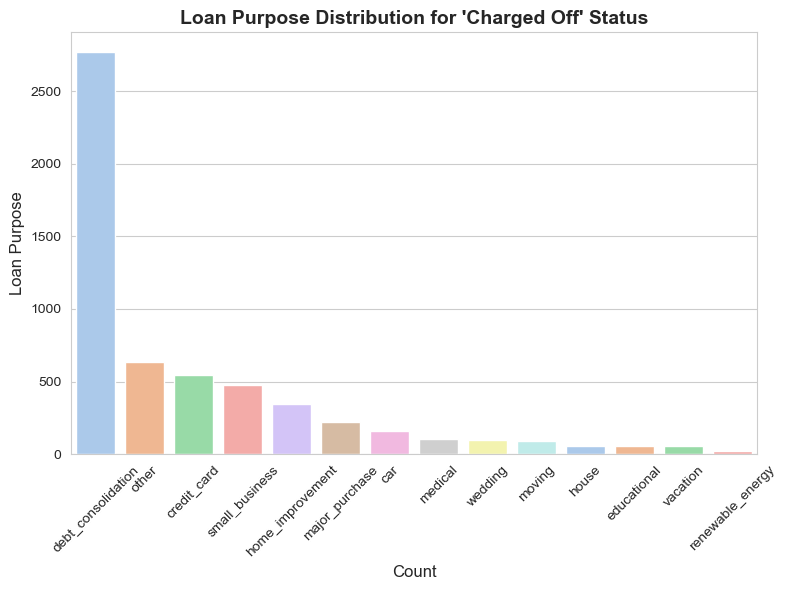

In [1064]:
# Extract data for plotting
y_data = charged_off_data['purpose'].value_counts()
x_data = y_data.index

#Visulize chart
create_barplot(
    x=x_data,
    y=y_data,
    title="Loan Purpose Distribution for 'Charged Off' Status",
    xlabel="Count",
    ylabel="Loan Purpose",
    rotation=45
)

> The majority of `Charged Off` loans are for the purpose of **debt consolidation**, with its count significantly higher than any other loan purposes. This indicates that borrowers consolidating debt may have a higher likelihood of defaulting compared to those taking loans for other purposes.

**Home Ownership Distribution for `Charged Off` Status**

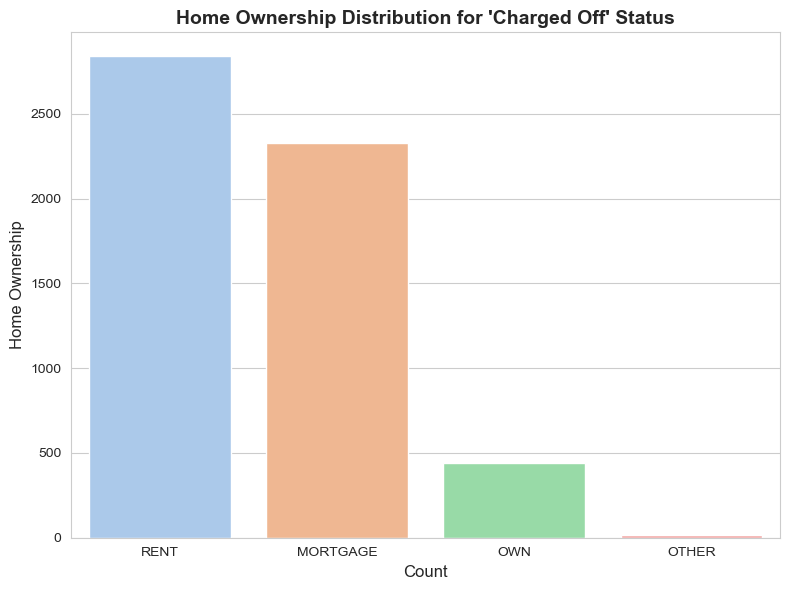

In [1065]:
# Extract data for plotting
y_data = charged_off_data['home_ownership'].value_counts()
x_data = y_data.index

#Visulize chart
create_barplot(
    x=x_data,
    y=y_data,
    title="Home Ownership Distribution for 'Charged Off' Status",
    xlabel="Count",
    ylabel="Home Ownership"
)

> Borrowers with **Rent** and **Mortgage** home ownership statuses represent the majority of `Charged Off` loans, likely due to financial pressure from paying rent or mortgage interest.

**Annual Income Distribution for 'Charged Off' Status**

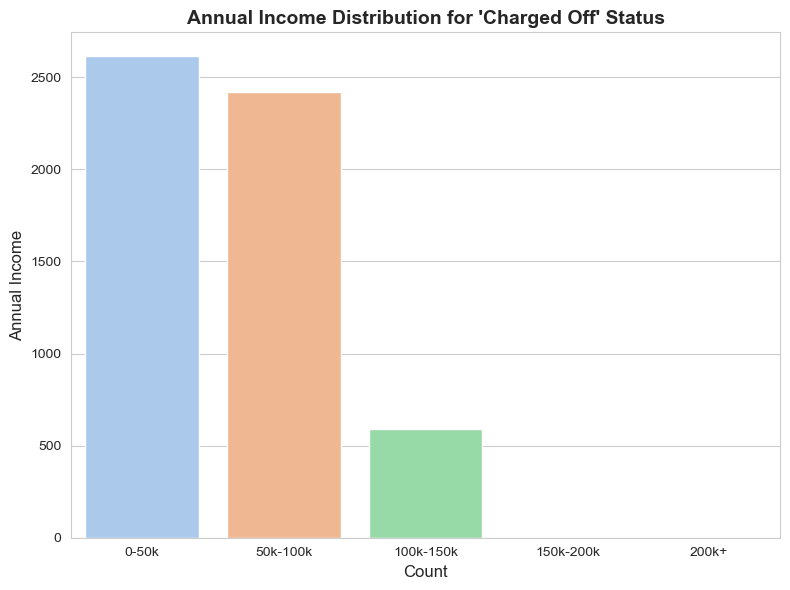

In [1066]:
# Extract data for plotting
y_data = charged_off_data['income_bucket'].value_counts()
x_data = y_data.index

#Visulize chart
create_barplot(
    x=x_data,
    y=y_data,
    title="Annual Income Distribution for 'Charged Off' Status",
    xlabel="Count",
    ylabel="Annual Income"
)

> For borrowers with `Charged Off` status, the majority have an annual income of less than 100K. A possible reason could be that individuals in this income range might have **limited financial flexibility** and **higher debt-to-income ratios**, making it more challenging to manage loan repayments effectively.

### Bivariate Analysis

**Term vs Loan Status**

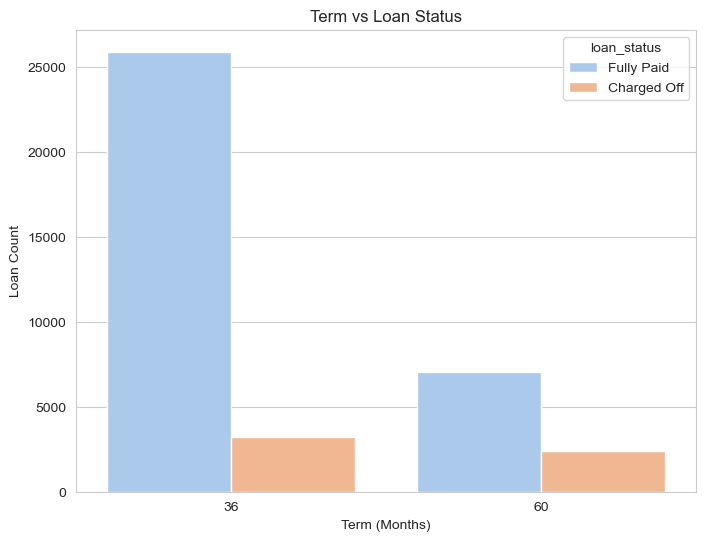

In [1067]:
fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=100)

sns.countplot(x='term', hue='loan_status', data=loan, palette=PALETTE)

ax.set_xlabel("Term (Months)")
ax.set_ylabel("Loan Count")

ax.set_title('Term vs Loan Status')

plt.show()

**Interest Rate vs Loan Status**

In [1068]:
get_distinct_values(loan, 'emp_length')

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

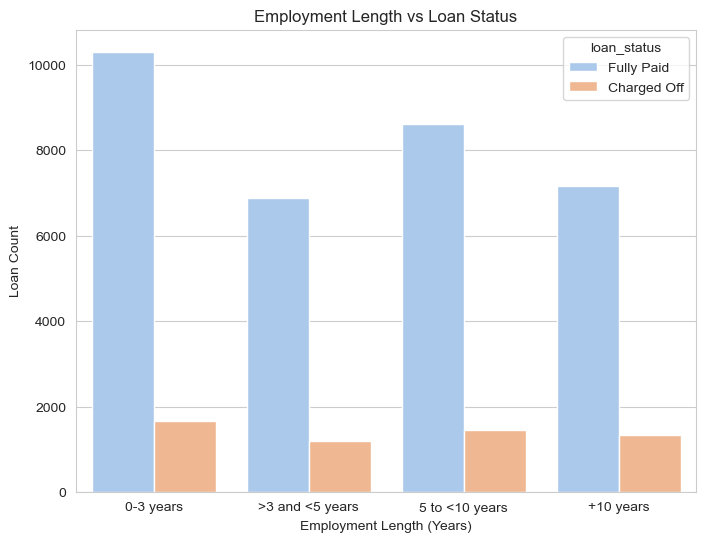

In [1069]:
fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=100)
sns.countplot(x='emp_length_bucket', hue='loan_status', data=loan, palette=PALETTE)

ax.set_xlabel("Employment Length (Years)")
ax.set_ylabel("Loan Count")

ax.set_title('Employment Length vs Loan Status')

plt.show()

> Borrowers with interest rates above 10% show a higher likelihood of default. This indicates that interest rates are a significant risk factor in loan defaults.

**Loan Status vs Loan Amount**

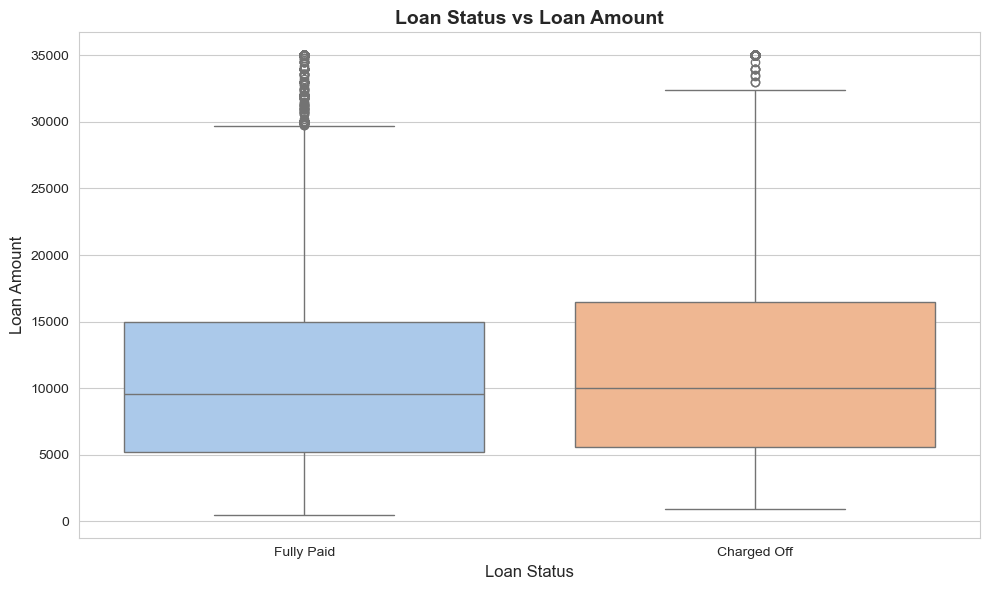

In [1070]:
create_boxplot_chart(
    data=loan,
    x='loan_status',
    y='loan_amnt',
    title='Loan Status vs Loan Amount',
    xlabel='Loan Status',
    ylabel='Loan Amount'
)


> Charged-off loans tend to have slightly higher loan amounts on average compared to fully paid loans.

**Loan Status vs Annual Income**

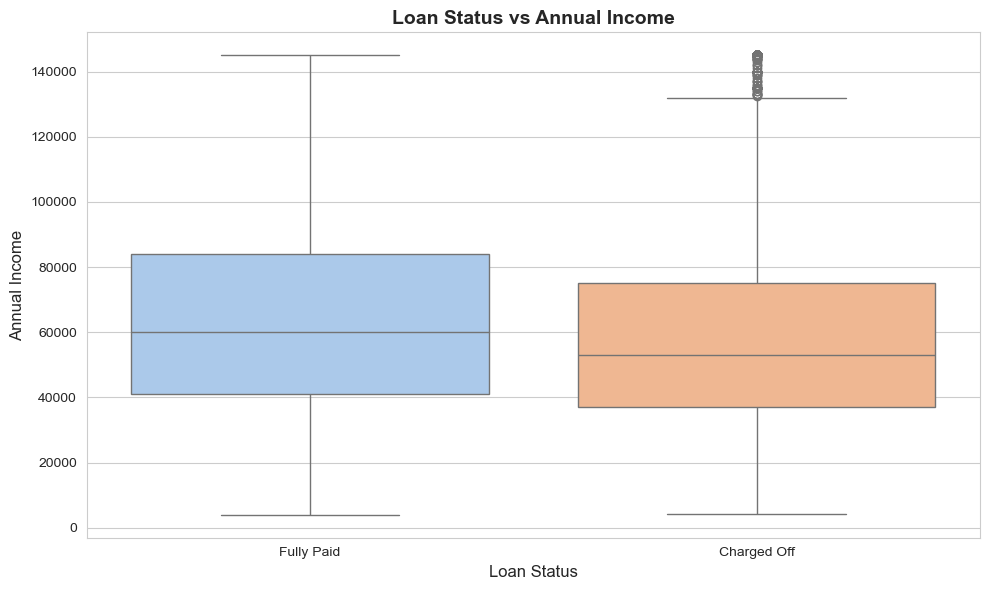

In [1071]:
create_boxplot_chart(
    data=loan,
    x='loan_status',
    y='annual_inc',
    title='Loan Status vs Annual Income',
    xlabel='Loan Status',
    ylabel='Annual Income'
)

**Loan Status vs DTI**

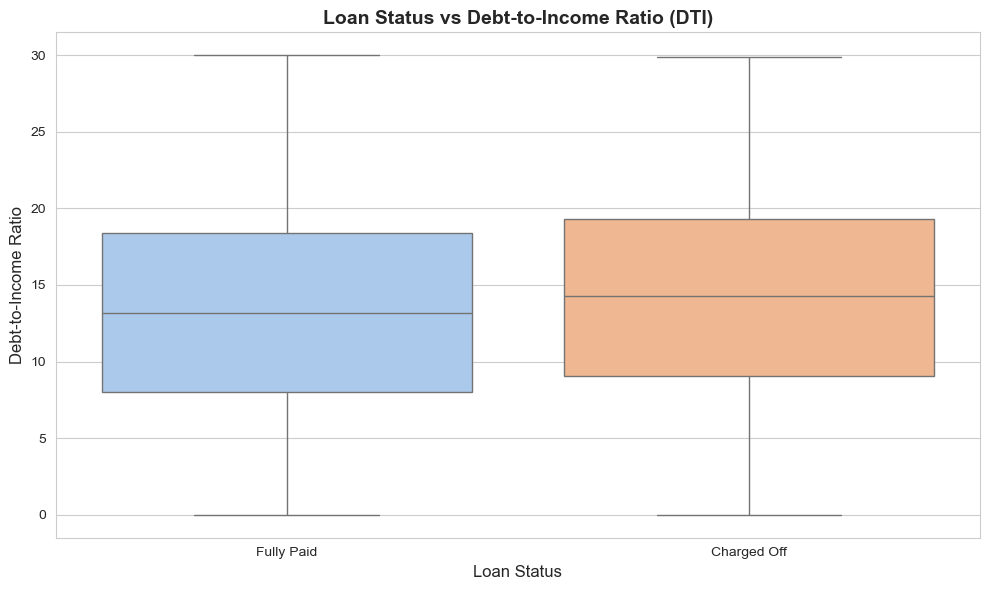

In [1072]:
create_boxplot_chart(
    data=loan,
    x='loan_status',
    y='dti',
    title='Loan Status vs Debt-to-Income Ratio (DTI)',
    xlabel='Loan Status',
    ylabel='Debt-to-Income Ratio'
)

> Marginally higher DTI observed for charged-off loans, although its correlation with other variables is low

**Interest Rate Distribution by Loan Status**

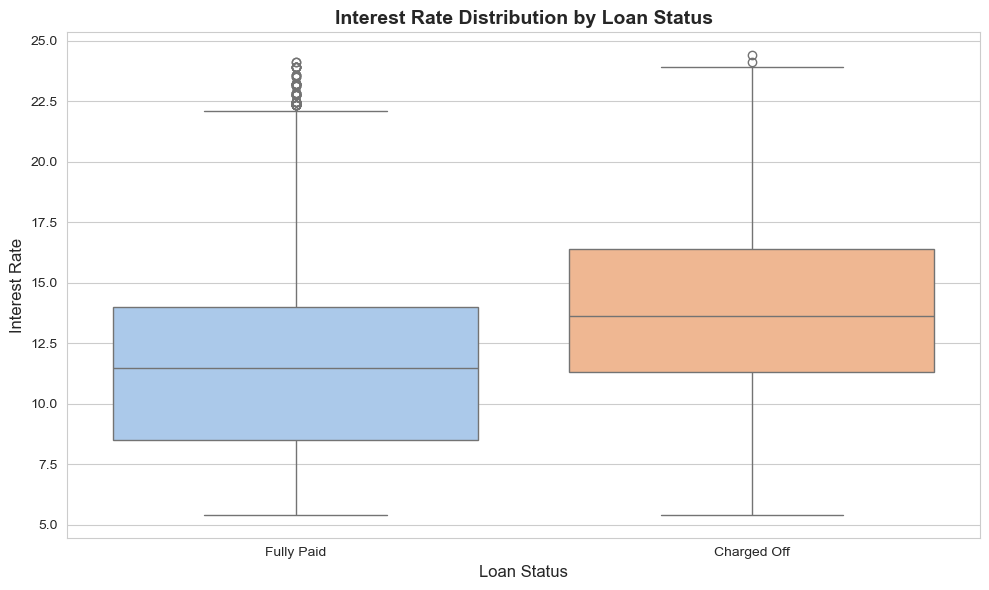

In [1073]:
create_boxplot_chart(
    data=loan,
    x='loan_status',
    y='int_rate',
    title='Interest Rate Distribution by Loan Status',
    xlabel='Loan Status',
    ylabel='Interest Rate'
)

### **Multivariate Analysis**

**Correlation heatmap for "Charged Off" loans**

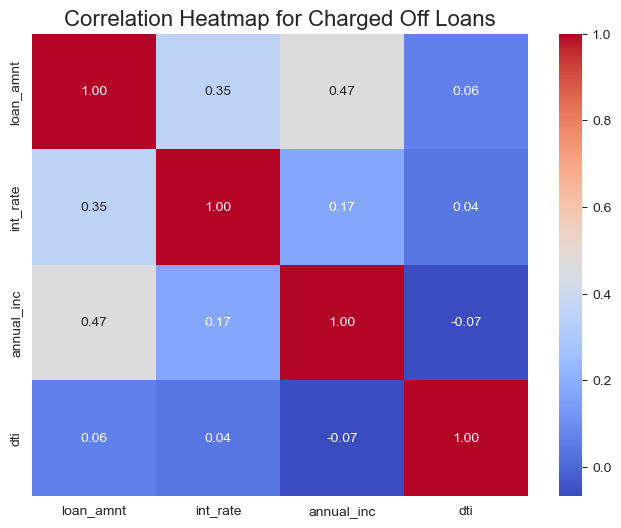

In [1074]:
# Correlation heatmap for "Charged Off" loans

plt.figure(figsize=FIG_SIZE)
sns.heatmap(charged_off_data[['loan_amnt', 'int_rate', 'annual_inc', 'dti']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Charged Off Loans', fontsize=16)
plt.show()

> Moderate correlations between Loan Amount and Annual Income (0.47) and Loan Amount and Interest Rate (0.35).

> Weak or negligible correlations for DTI, suggesting it acts independently in assessing default risk.

## **Findings**

#### **Univariate Analysis**

**Loan Status**
- **Fully Paid**: Represents 85.4% of loans, indicating effective credit policies.
- **Charged Off**: Accounts for 14.6%, highlighting areas for improvement in borrower assessment.

**Interest Rate Distribution**
- Peaks observed at 10%-15% for charged-off loans, suggesting interest rates are a significant risk factor.

**Loan Purpose**
- Majority of charged-off loans are for **debt consolidation**, with smaller portions attributed to **credit card** and **small business loans**.

**Home Ownership**
- Borrowers with **"RENT"** and **"MORTGAGE"** home ownership statuses dominate the charged-off category, likely due to financial pressures from rent or mortgage payments.

**Annual Income**
- The majority of borrowers with charged-off loans earn **less than $100K annually**, indicating income as a critical determinant of default risk.

**Employment Length**
- Borrowers with **10+ years of employment** form a significant portion of defaults, showing that employment stability alone does not mitigate risk.

---

#### **Bivariate Analysis**

**Interest Rate vs. Loan Status**
- Borrowers with **interest rates above 10%** show a higher likelihood of default.

**Loan Amount vs. Loan Status**
- Charged-off loans tend to have **slightly higher loan amounts** on average compared to fully paid loans.

**DTI vs. Loan Status**
- Marginally higher **Debt-to-Income (DTI)** observed for charged-off loans, although its correlation with other variables is low.

---

#### **Multivariate Analysis**

**Correlation Heatmap**
- **Moderate correlations** between:
  - Loan Amount and Annual Income (**0.47**).
  - Loan Amount and Interest Rate (**0.35**).
- **Weak or negligible correlations** for DTI, suggesting it acts independently in assessing default risk.

**Loan Term**
- Charged-off loans are more common for **36-month terms**, indicating shorter-term loans may pose higher risks.

## **Recommendations**

#### **Dynamic Risk-Based Pricing**
- Adjust interest rates for borrowers in the **10%-15% range** to better balance risk and profitability.

#### **Enhanced Screening for Debt Consolidation Loans**
- Strengthen risk assessment protocols for borrowers applying for **debt consolidation**, which accounts for the majority of charged-off loans.

#### **Income-Driven Assessments**
- Incorporate robust **income-based criteria** to identify high-risk borrowers, particularly those earning below **$100K**.

#### **Refined Loan Structuring**
- Introduce **caps on debt-to-income ratios** to minimize default risks.
- Offer **tailored loan amounts and terms** based on borrower profiles and repayment history.

#### **Employment Tenure Evaluation**
- Reassess reliance on **employment length** as a primary stability factor and consider additional financial metrics.

#### **Portfolio Monitoring and Policy Adjustments**
- Continuously analyze trends in **loan purposes, borrower demographics,** and **repayment behaviors**.
- Utilize **predictive modeling** to proactively refine risk management strategies.